In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colormaps

In [2]:
def simulate(P_r, P_s, P_p, nr_init, ns_init, np_init, steps=100):
    n_r = np.zeros(steps)
    n_s = np.zeros(steps)
    n_p = np.zeros(steps)

    n_r[0] = nr_init
    n_s[0] = ns_init
    n_p[0] = np_init

    for t in range(0, steps-1):
        n_r[t+1] = n_r[t] + n_r[t]*(n_s[t]*P_r - n_p[t]*P_p)
        n_s[t+1] = n_s[t] + n_s[t]*(n_p[t]*P_s - n_r[t]*P_r)
        n_p[t+1] = n_p[t] + n_p[t]*(n_r[t]*P_p - n_s[t]*P_s)
    
    return pd.DataFrame({'rock': n_r, 'scissors': n_s, 'paper': n_p})

<Axes: >

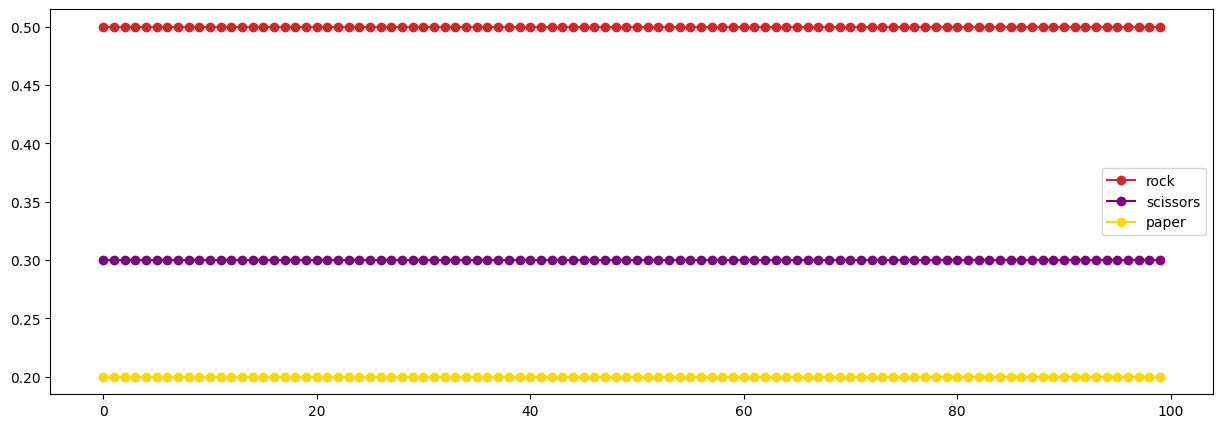

In [3]:
# equilibrium
fig, ax = plt.subplots(1, figsize=(15, 5))
results_df = simulate (P_r=0.2, P_s=0.5, P_p=0.3, nr_init=0.5, ns_init=0.3, np_init=0.2, steps=100)
results_df.plot(style='o-', ax=ax, color=['tab:red', 'purple', 'gold'])

<Axes: >

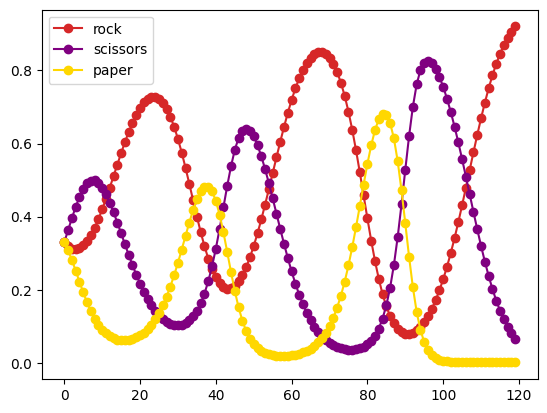

In [4]:
results_df = simulate (P_r=0.2, P_s=0.5, P_p=0.3, nr_init=0.33, ns_init=0.33, np_init=0.33, steps=120)
results_df.plot(style='-o', color=['tab:red', 'purple', 'gold'])

In [5]:
results_df.min()

rock        0.079378
scissors    0.035906
paper       0.000967
dtype: float64

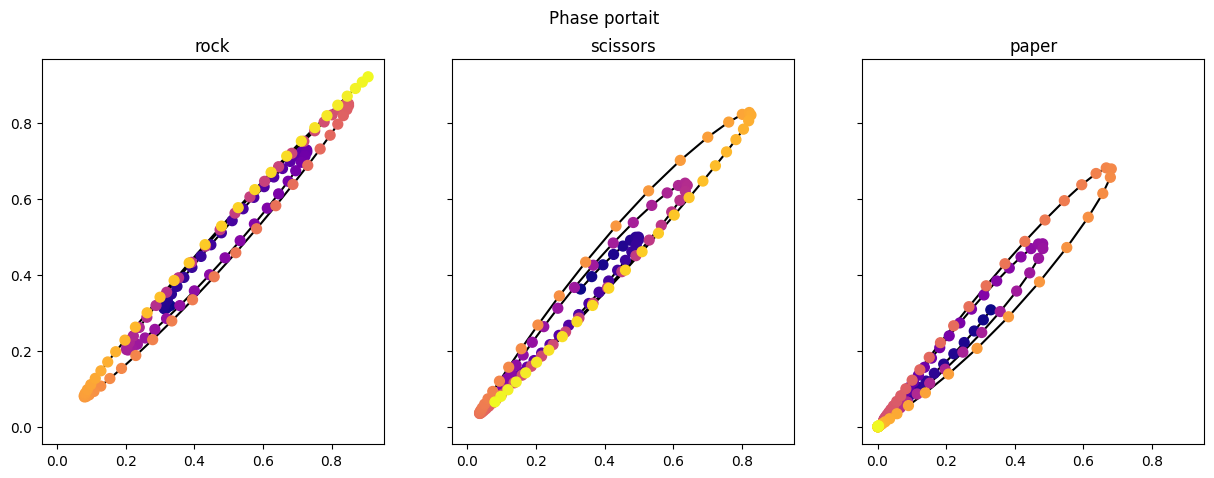

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)
cmap = colormaps['plasma']
colors = cmap(np.linspace(0, 1, (results_df['rock'].shape[0]-1))) 
axs[0].plot(results_df['rock'][0:-1], results_df['rock'][1:], '-', color='k', zorder=1)
axs[0].scatter(results_df['rock'][0:-1], results_df['rock'][1:], c=colors, s=50, zorder=2)
axs[0].set_title('rock')
axs[1].plot(results_df['scissors'][0:-1], results_df['scissors'][1:], '-', label='scissors', color='k', zorder=1)
axs[1].scatter(results_df['scissors'][0:-1], results_df['scissors'][1:], c=colors, s=50, zorder=2)
axs[1].set_title('scissors')
axs[2].plot(results_df['paper'][0:-1], results_df['paper'][1:], '-', color='k', zorder=1)
axs[2].scatter(results_df['paper'][0:-1], results_df['paper'][1:], c=colors, s=50, zorder=2) 
axs[2].set_title('paper')
fig.suptitle("Phase portait");
# NOTE: actual phase portait is 4D

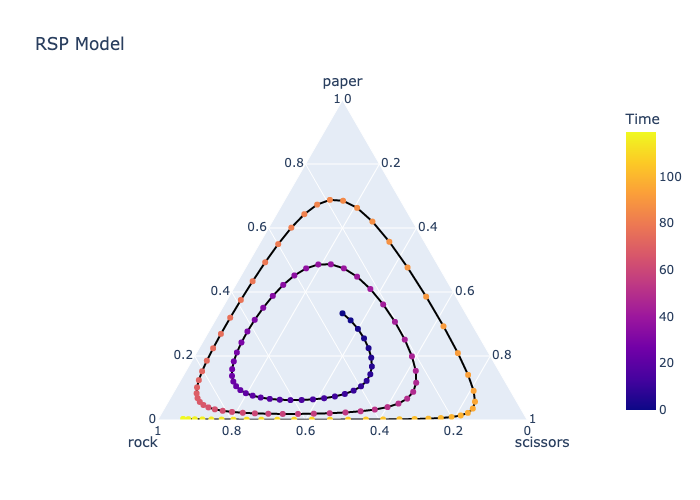

In [7]:
fig = px.scatter_ternary(
    results_df,
    a="paper",
    b="rock",
    c="scissors",
    color=results_df.index,
    size_max=10,
    title="RSP Model"
    )
fig.update_traces(mode='lines+markers', line=dict(color='black'))
fig.update_layout(coloraxis_colorbar=dict(title='Time'))
fig.show('png')

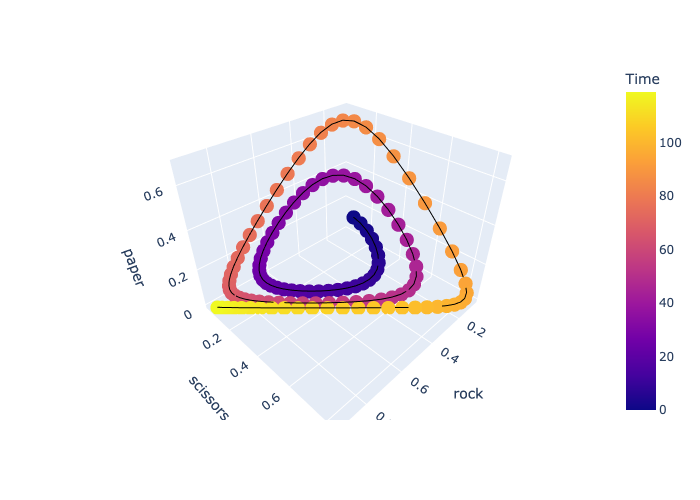

In [8]:
fig = px.scatter_3d(results_df, x='rock', y='scissors', z='paper', color=results_df.index)
fig.update_traces(mode='lines+markers', line=dict(color='black'))
fig.update_layout(coloraxis_colorbar=dict(title='Time'))
fig.show()
fig.show('png')

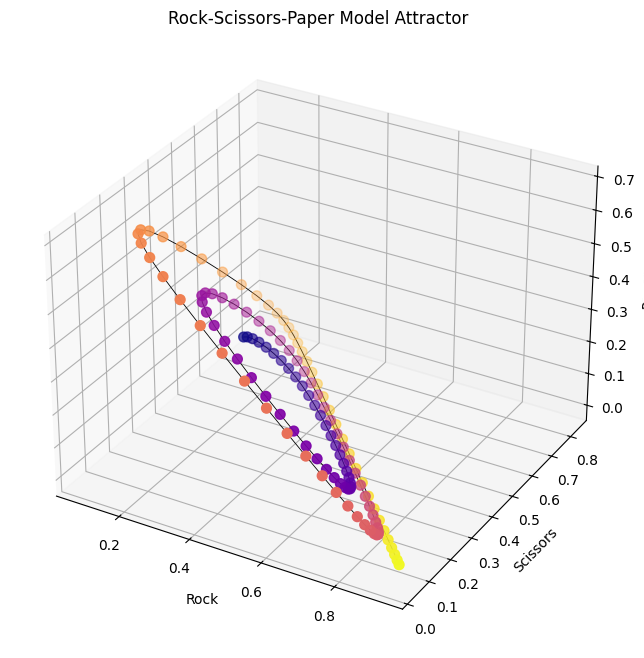

In [9]:
xyzs = np.array(results_df)
ax = plt.figure(figsize=(12, 8)).add_subplot(projection='3d')
ax.plot(*xyzs.T, 'k', lw=0.6)
colors = cmap(np.linspace(0, 1, (results_df['rock'].shape[0]))) 
ax.scatter(*xyzs.T, c=colors, s=50, zorder=2)
ax.set_xlabel("Rock")
ax.set_ylabel("Scissors")
ax.set_zlabel("Paper")
ax.set_title("Rock-Scissors-Paper Model Attractor")
plt.show()